# Illustrations for Global, Contextual, Collective Anomalies

In [31]:
import random

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
np.random.seed(42)

In [33]:
sns.set(font_scale=2)
sns.set_style("white")
sns.set_context("talk")

In [34]:
palette = "blend:#009f06,#ddffdd"

In [35]:
DPI = 300

In [36]:
global_normal, _ = make_blobs(centers=1, random_state=42)

In [37]:
global_normal = pd.DataFrame(global_normal, columns=['Признак 1', 'Признак 2'])

In [38]:
global_normal['anomaly'] = 0

In [39]:
global_anomaly = pd.DataFrame({'Признак 1': [-6, -7], 'Признак 2': [13, 13.1]})

In [40]:
global_anomaly['anomaly'] = 1

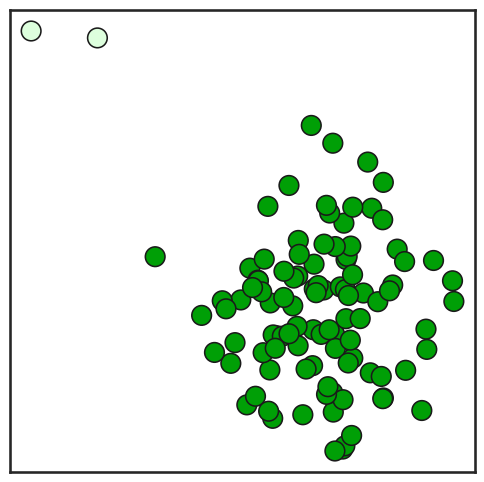

In [41]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(pd.concat([global_normal, global_anomaly]), x='Признак 1', y='Признак 2', 
                     s=200, edgecolor='k', hue='anomaly', legend=False, palette=palette)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
plt.savefig("images/global_anomaly.png", bbox_inches='tight', transparent=True, dpi=DPI)

In [42]:
contextual_normal, _ = make_blobs(centers=np.array([[-2, -2], [2, 2]]), random_state=42)

In [43]:
contextual_normal = pd.DataFrame(contextual_normal, columns=['Признак 1', 'Признак 2'])

In [44]:
contextual_normal['anomaly'] = 0

In [45]:
contextual_anomaly = pd.DataFrame({'Признак 1': [-3, -3.1], 'Признак 2': [2, 2.9]})

In [46]:
contextual_anomaly['anomaly'] = 1

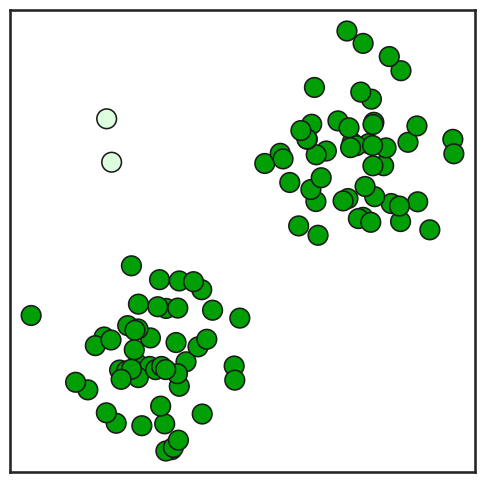

In [47]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(pd.concat([contextual_normal, contextual_anomaly]), x='Признак 1', y='Признак 2', 
                     s=200, edgecolor='k', hue='anomaly', legend=False, palette=palette)
ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
plt.savefig("images/contextual_anomaly.png", bbox_inches='tight', transparent=True, dpi=DPI)

In [48]:
grid_size = (5, 5)

In [49]:
x = np.linspace(0, 1, grid_size[0])
y = np.linspace(0, 1, grid_size[1])

In [50]:
X, Y = np.meshgrid(x, y)

In [51]:
noise_level = 0.02
X_noisy = X + np.random.uniform(-noise_level, noise_level, X.shape)
Y_noisy = Y + np.random.uniform(-noise_level, noise_level, Y.shape)

In [52]:
coordinates = np.column_stack((X_noisy.ravel(), Y_noisy.ravel()))

In [53]:
collective_normal = pd.DataFrame(coordinates, columns=['Признак 1', 'Признак 2'])

In [54]:
collective_normal['anomaly'] = 0

In [55]:
collective_normal.loc[16, 'anomaly'] = 1

In [56]:
random.seed(42)

In [57]:
collective_anomaly = pd.DataFrame({'Признак 1': [0.3 + random.uniform(-0.08, 0.08) for _ in range(8)], 
                                   'Признак 2': [0.8 + random.uniform(-0.08, 0.08) for _ in range(8)]})

In [58]:
collective_anomaly['anomaly'] = 1

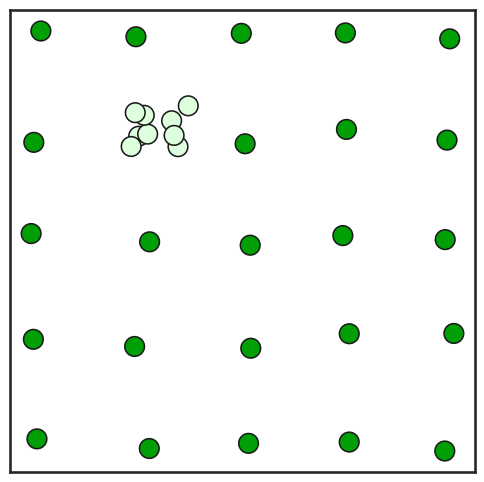

In [59]:
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(pd.concat([collective_normal, collective_anomaly]), x='Признак 1', y='Признак 2', 
                     s=200, edgecolor='k', hue='anomaly', legend=False, palette=palette)

ax.set(xlabel='', ylabel='')
ax.set(xticklabels=[], yticklabels=[])
plt.savefig("images/collective_anomaly.png", bbox_inches='tight', transparent=True, dpi=DPI)

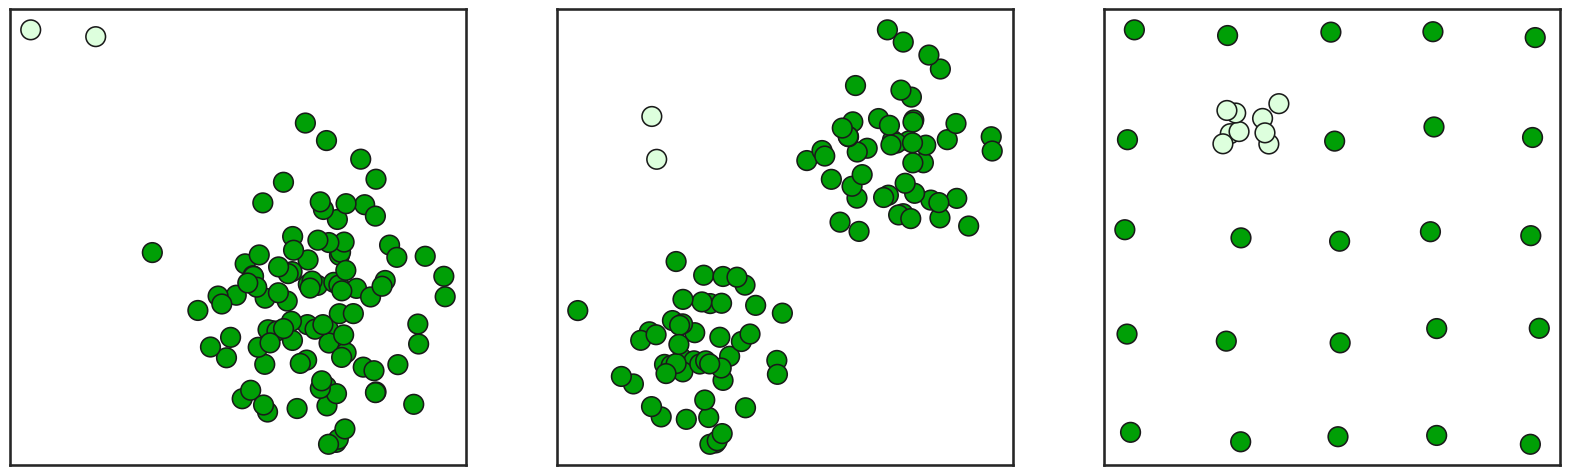

In [60]:
_, [axs_glob, axs_cont, axs_coll] = plt.subplots(1, 3,
                                     figsize=(20, 6), 
                                     sharex=False,
                                     gridspec_kw=dict(width_ratios=[1, 1, 1]))
sns.scatterplot(pd.concat([global_normal, global_anomaly]), x='Признак 1', y='Признак 2', 
                color='#00ab37', s=200, edgecolor='k', hue='anomaly', legend=False, 
                palette=palette, ax=axs_glob)
axs_glob.set(xlabel='', ylabel='')
axs_glob.set(xticklabels=[], yticklabels=[])
axs_glob.set_box_aspect(1)

sns.scatterplot(pd.concat([contextual_normal, contextual_anomaly]), x='Признак 1', y='Признак 2', 
                     s=200, edgecolor='k', hue='anomaly', legend=False, palette=palette, ax=axs_cont)
axs_cont.set(xlabel='', ylabel='')
axs_cont.set(xticklabels=[], yticklabels=[])
axs_cont.set_box_aspect(1)

sns.scatterplot(pd.concat([collective_normal, collective_anomaly]), x='Признак 1', y='Признак 2', 
                s=200, edgecolor='k', hue='anomaly', legend=False, palette=palette, ax=axs_coll)

axs_coll.set(xlabel='', ylabel='')
axs_coll.set(xticklabels=[], yticklabels=[])
axs_coll.set_box_aspect(1)

plt.savefig("images/global_contextual_collective_anomaly.png", bbox_inches='tight', transparent=True, dpi=DPI)